In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("kidney_disease.csv")

In [3]:
df.drop("id",axis=1,inplace=True)

## Cleaning DATA

In [4]:
# Rename all colums and make user friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [5]:
data = df.copy()

In [6]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
data.shape

(400, 25)

In [8]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
data["white_blood_cell_count"] = data["white_blood_cell_count"].replace("\t?",str(np.nan))

In [11]:
# change data type to flote
data["white_blood_cell_count"] = data["white_blood_cell_count"].astype(float)

In [12]:
data["packed_cell_volume"] = data["packed_cell_volume"].str.replace("\t?","")

In [13]:
data["packed_cell_volume"] =  data["packed_cell_volume"].str.replace("?",str(np.nan)).astype(float)

In [14]:
data["red_blood_cell_count"] = data["red_blood_cell_count"].replace("\t?",str(np.nan)).astype(float)

In [15]:
data["diabetes_mellitus"] = data["diabetes_mellitus"].str.replace(" ","")

In [16]:
data["diabetes_mellitus"] = data["diabetes_mellitus"].str.replace("\t","")

In [17]:
data["class"] = data["class"].str.replace("\t","")

In [18]:
data["coronary_artery_disease"] = data["coronary_artery_disease"].str.replace("\t","")

In [19]:
# convert ckd in to 0 and notckd into 1
data["class"] = data["class"].str.replace("ckd","0")

In [20]:
data["class"] = data["class"].str.replace("not0","1")

In [21]:
data["class"] = pd.to_numeric(data["class"])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [23]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.375000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


In [24]:
catigerocal_features = data.dtypes[data.dtypes == "object"].index

In [25]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [26]:
for i in catigerocal_features:
    print(f"{i}: {data[i].unique()}")

red_blood_cells: [nan 'normal' 'abnormal']
pus_cell: ['normal' 'abnormal' nan]
pus_cell_clumps: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
hypertension: ['yes' 'no' nan]
diabetes_mellitus: ['yes' 'no' nan]
coronary_artery_disease: ['no' 'yes' nan]
appetite: ['good' 'poor' nan]
peda_edema: ['no' 'yes' nan]
aanemia: ['no' 'yes' nan]


In [27]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [28]:
data["red_blood_cells"].value_counts(normalize=True)*100

normal      81.048387
abnormal    18.951613
Name: red_blood_cells, dtype: float64

In [29]:
for i in catigerocal_features:
    print(i,data[i].value_counts(normalize=True)*100)
    print("==============================================")

red_blood_cells normal      81.048387
abnormal    18.951613
Name: red_blood_cells, dtype: float64
pus_cell normal      77.313433
abnormal    22.686567
Name: pus_cell, dtype: float64
pus_cell_clumps notpresent    89.393939
present       10.606061
Name: pus_cell_clumps, dtype: float64
bacteria notpresent    94.444444
present        5.555556
Name: bacteria, dtype: float64
hypertension no     63.065327
yes    36.934673
Name: hypertension, dtype: float64
diabetes_mellitus no     65.577889
yes    34.422111
Name: diabetes_mellitus, dtype: float64
coronary_artery_disease no     91.457286
yes     8.542714
Name: coronary_artery_disease, dtype: float64
appetite good    79.448622
poor    20.551378
Name: appetite, dtype: float64
peda_edema no     80.952381
yes    19.047619
Name: peda_edema, dtype: float64
aanemia no     84.962406
yes    15.037594
Name: aanemia, dtype: float64


<Figure size 1100x800 with 0 Axes>

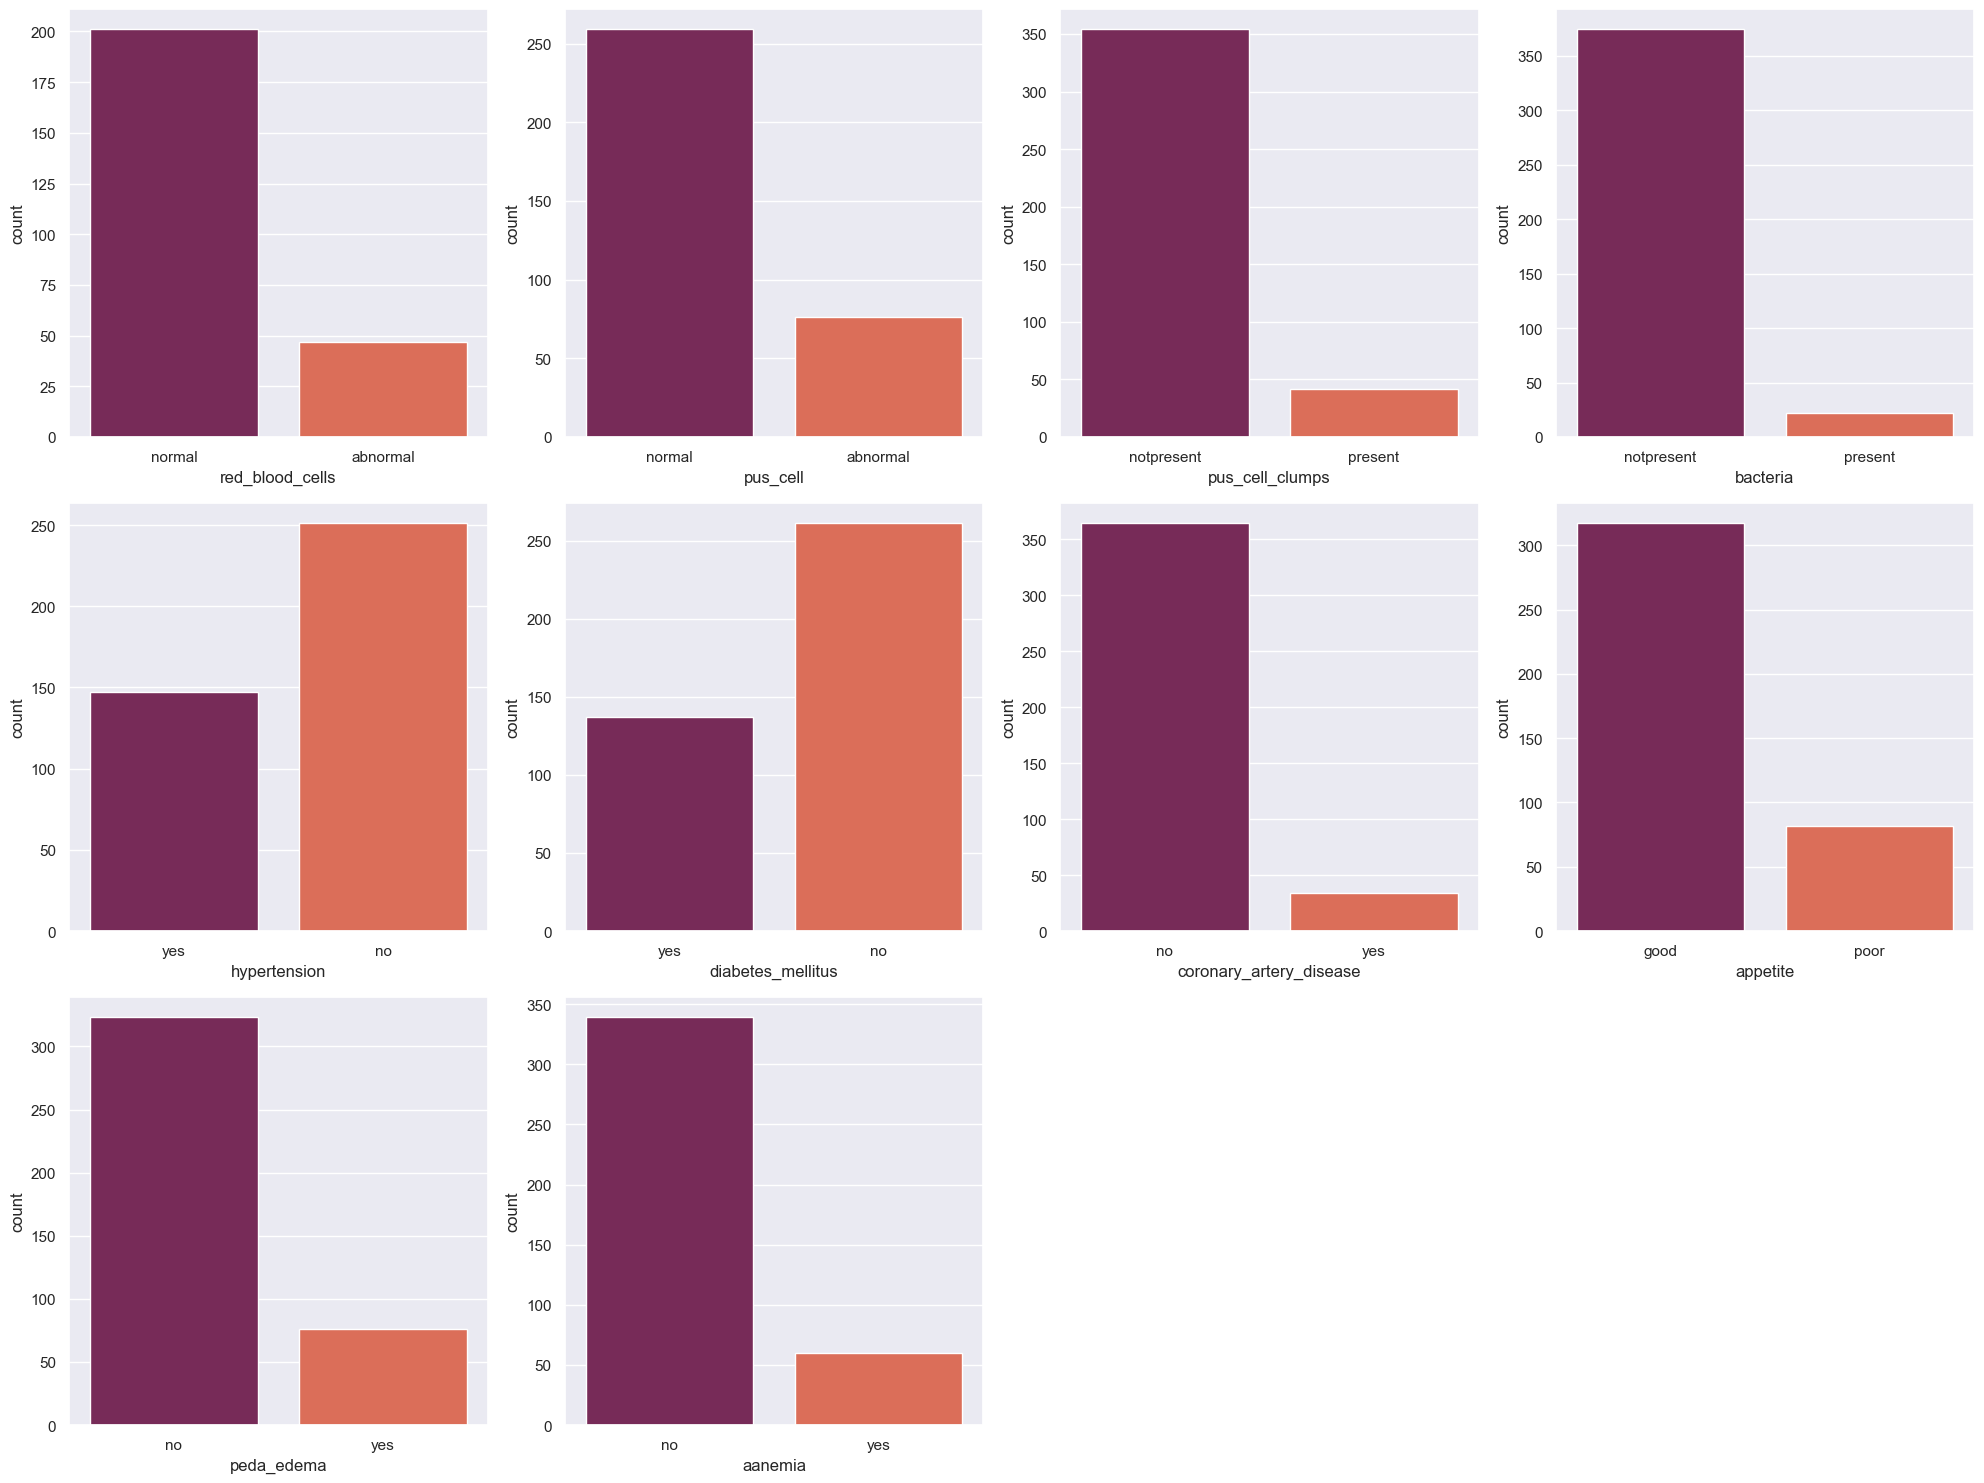

In [36]:
# count plot of all catiogerical values
try:
    plt.suptitle("univeriance catogorical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)
    plt.figure(figsize = (20, 15))
    plotnumber = 1
    for i in range(0,len(catigerocal_features)):
        if plotnumber <= 10:
            ax = plt.subplot(3, 4, plotnumber)
            sns.countplot(x=data[catigerocal_features[i]],palette = 'rocket')
        plotnumber += 1

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(e)


num must be 1 <= num <= 12, not 13


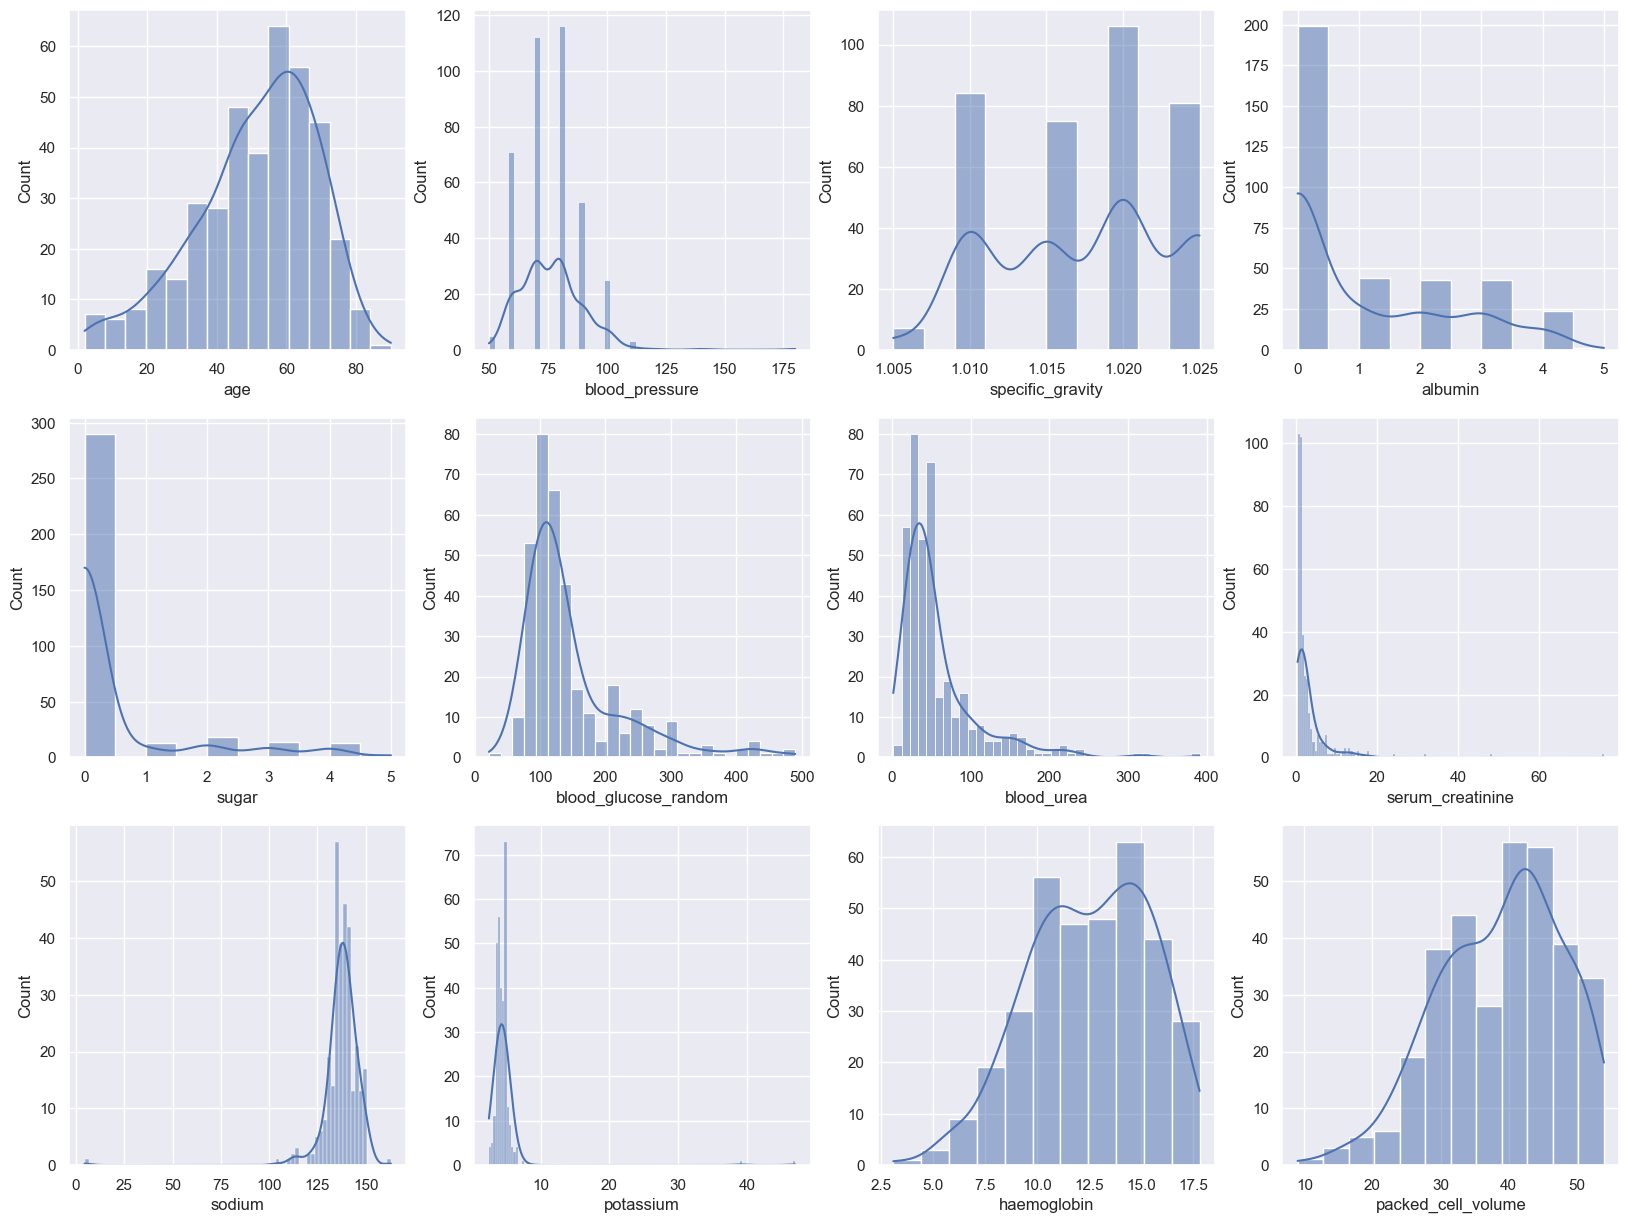

In [40]:
# Distribution of all numeric_features
try:
    plt.figure(figsize = (20, 15))
    plotnumber = 1
    for i in range(0,len(numerical_features)):
        if plotnumber <= 13:
            ax = plt.subplot(3, 4, plotnumber)
            sns.histplot(x=data[numerical_features[i]],kde=True,palette = 'rocket')
        plotnumber += 1

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(e)


<AxesSubplot:xlabel='red_blood_cells', ylabel='age'>

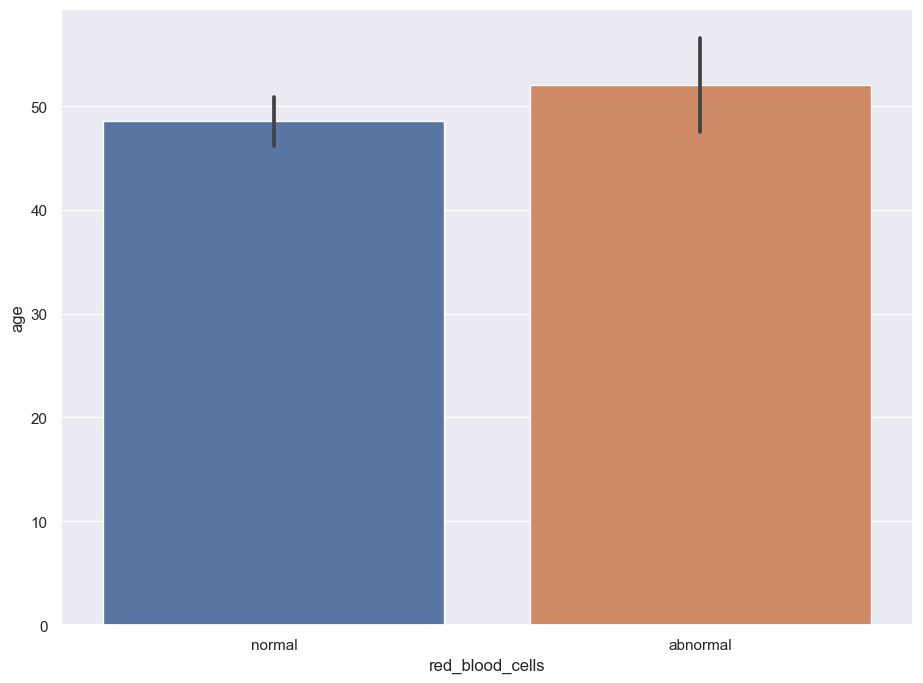

In [61]:
sns.barplot(x="red_blood_cells",y="age",data=data)

<AxesSubplot:>

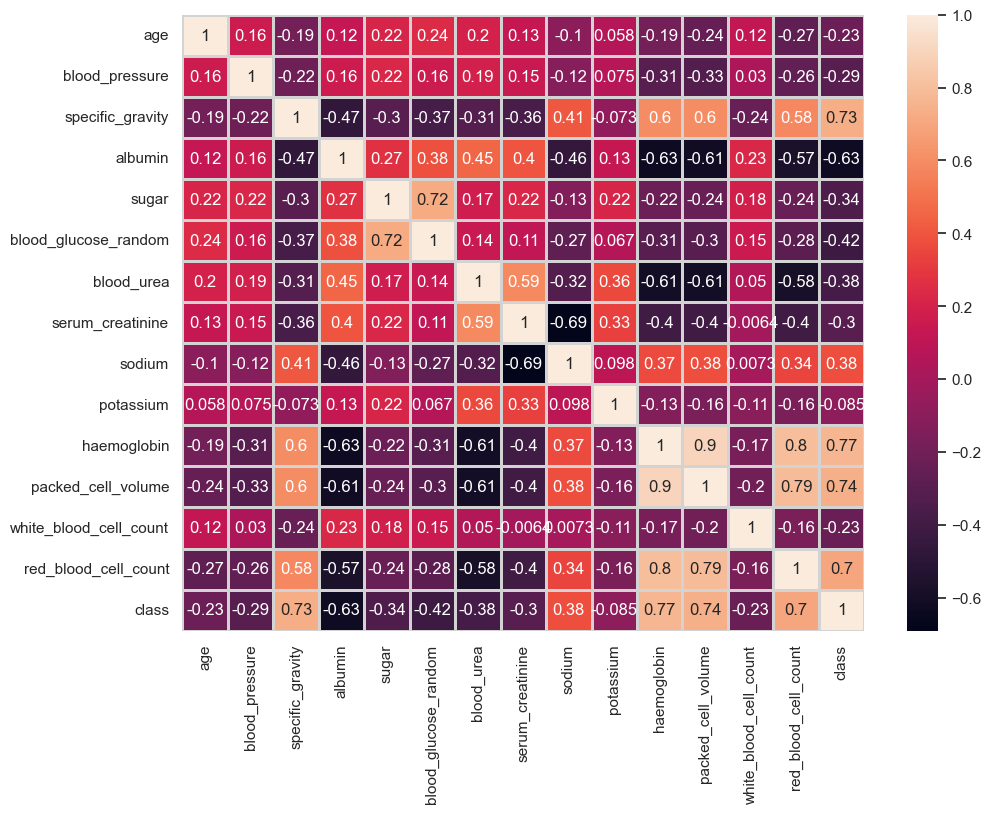

In [68]:
sns.heatmap(data.corr(),annot = True, linewidths = 2, linecolor = 'lightgrey')

In [72]:
def bar_grp(coll1,coll2,dt):
    sns.barplot(x=coll1,y=coll2,data=dt)

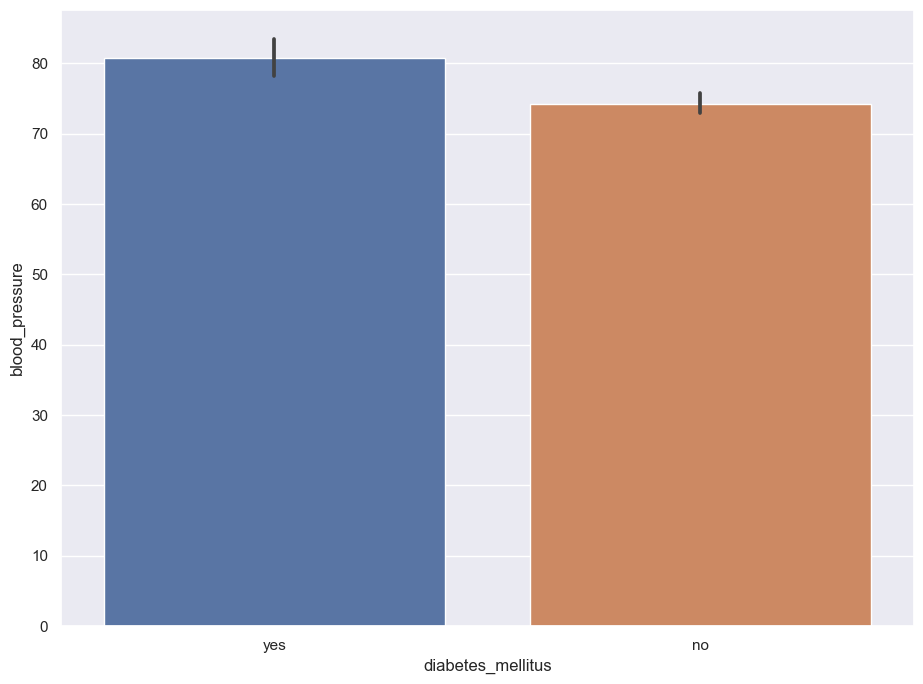

In [81]:
bar_grp("diabetes_mellitus","blood_pressure",dt=data)

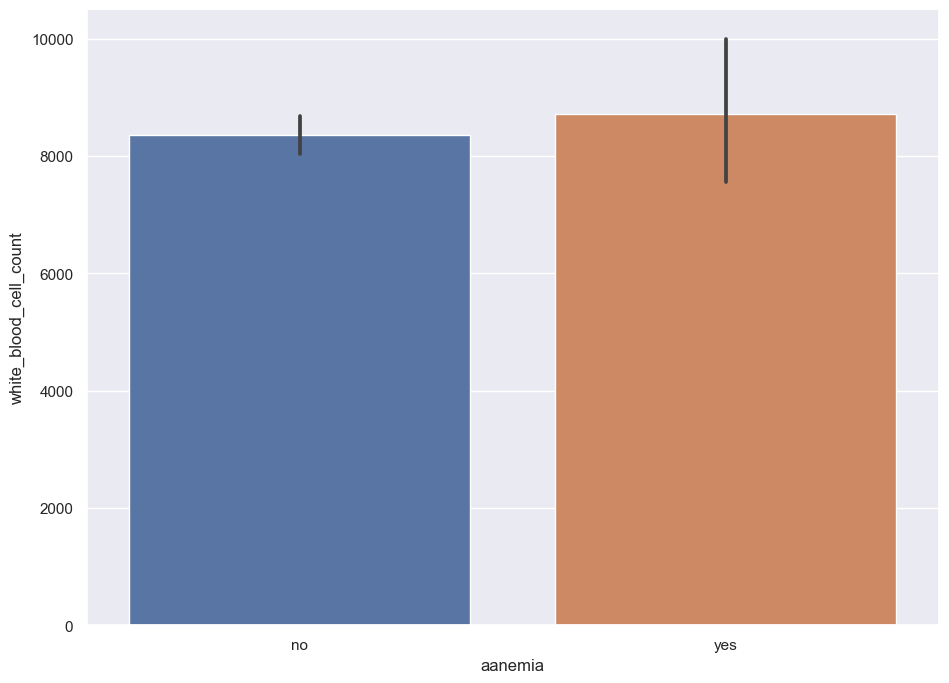

In [82]:
bar_grp('aanemia','white_blood_cell_count',dt=data)

In [92]:
bloodpr_class = data.groupby("blood_pressure")["class"].sum().sort_values(ascending=False).reset_index()

In [93]:
bloodpr_class

,blood_pressure,class
0,80.0,65
1,60.0,45
2,70.0,38
3,50.0,0
4,90.0,0
5,100.0,0
6,110.0,0
7,120.0,0
8,140.0,0
9,180.0,0


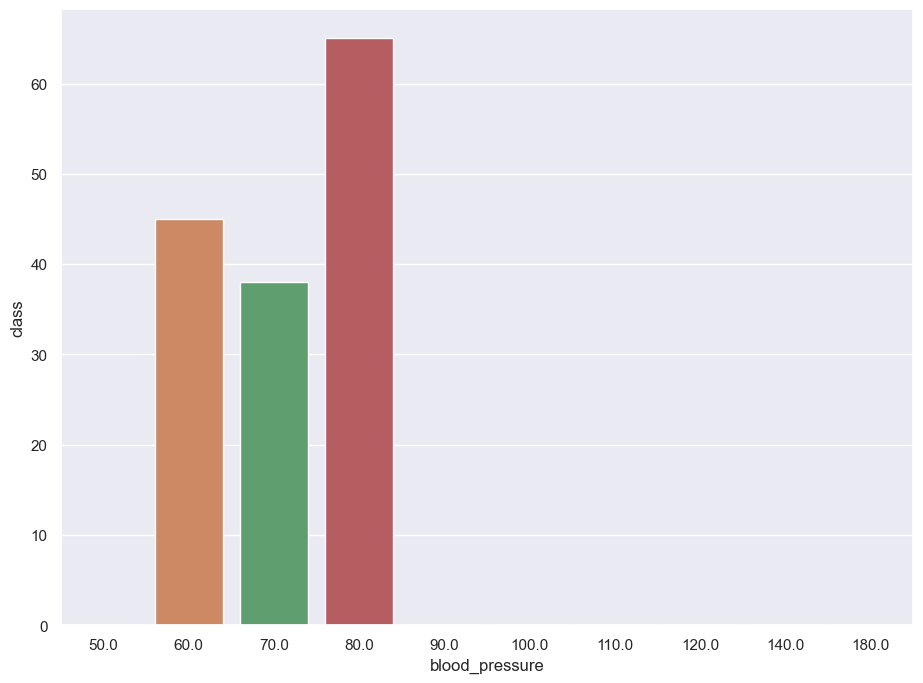

In [95]:
bar_grp("blood_pressure","class",dt=bloodpr_class)

num must be 1 <= num <= 12, not 13


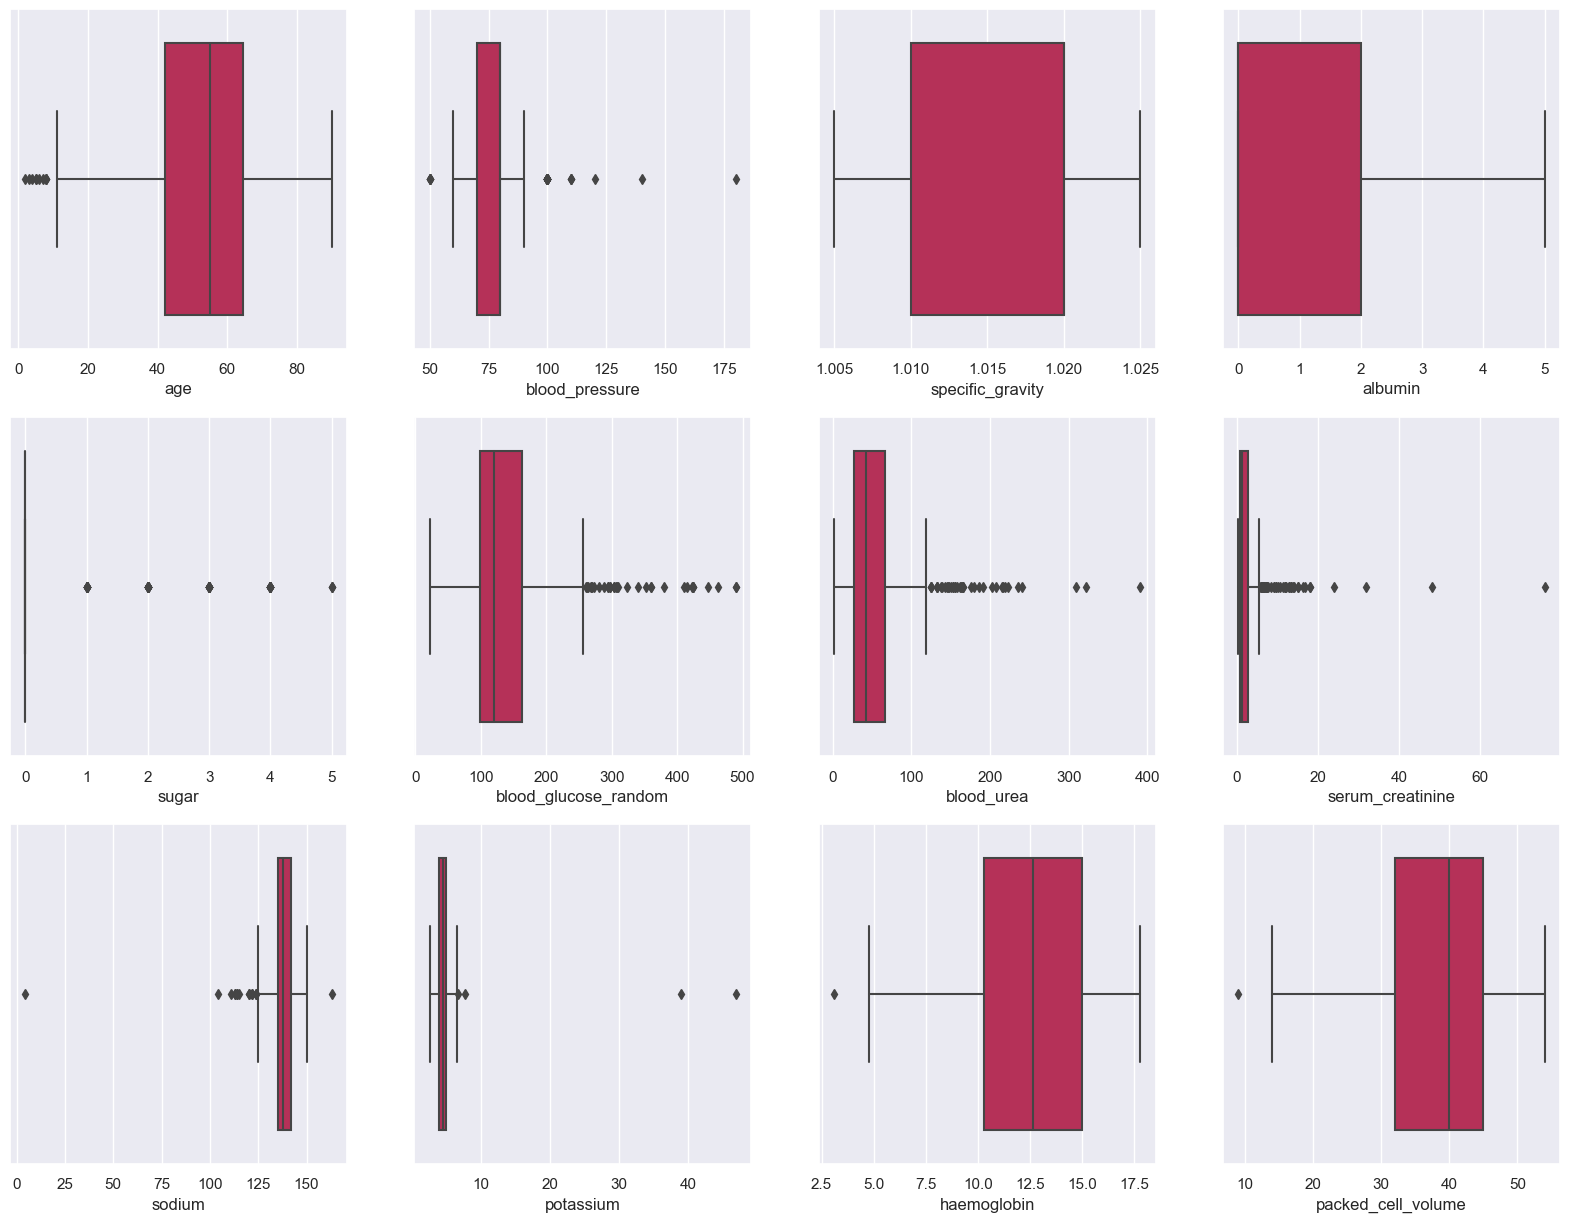

In [98]:
try:
    plt.figure(figsize = (20, 15))
    plotnumber = 1
    for i in range(0,len(numerical_features)):
        if plotnumber <= 13:
            ax = plt.subplot(3, 4, plotnumber)
            sns.boxplot(x=data[numerical_features[i]],palette = 'rocket')
        plotnumber += 1

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(e)
